# Structure Learning in Bayesian Networks
### Based on Chapter 18 of *Probabilistic Graphical Models* by Koller & Friedman
### Presented By: Serkalem Negusse


## 🎯 Objectives
- Understand structure learning concepts from Chapter 18
- Apply constraint-based and score-based learning
- Visualize learned Bayesian networks
- Evaluate learned models against ground truth


##  Content Outline
1. Introduction to Structure Learning
2. Constraint-Based Approaches
3. Score-Based Approaches
4. Structure Search Methods
5. Bayesian Model Averaging
6. Learning with Additional Structure
7. Practical Applications
8. Visualization Strategies
9. Practical Examples
10. Summary

In [1]:

!pip install pgmpy networkx matplotlib pandas scikit-learn


## Introduction to Structure Learning
- Learn Bayesian network structure from data
- **Goal:** Find a graph G that explains dataset D ~ P*(X)
- **Key challenge:** multiple structures can represent same independencies
- Use in discovering causal patterns or improving predictions

## Constraint - Based Approaches
- Uses conditional independence (CI) tests to learn structure
- Example: PC algorithm (skeleton + v-structure orientation)
- Pros: Intuitive, explainable
- Cons: Sensitive to errors in CI testing

## Score - Based Approach
- Assign a score to each structure (e.g., BIC, BDe)
- Optimize over possible structures
- Balances model fit and complexity
- Handles noisy data more robustly than constraint-based methods

## Structure Search
- Search space is exponential in number of variables
- Use heuristics: hill-climbing, tabu search, genetic algorithms, MCMC
- Trade-off between completeness and computational cost

## Bayesian Model Averaging
- Instead of one structure, average over many using their posterior probability
- Reduces overfitting and gives edge confidence
- Useful in domains with noisy or sparse data

## Learning with Additional Structure
- Incorporate structured CPDs: noisy-OR, tree-CPDs, parameter sharing
- Template models for relational domains (e.g., plate models)
- Improves generalization with fewer parameters

## Practical Applications
- Healthcare: Alarm Network for ICU patient monitoring
- Bioinformatics: Gene regulatory networks
- Recommendation Systems: Collaborative filtering
- Education: Student knowledge modeling
- Marketing: Customer behavior prediction

## Practical Examples
- Alarm Network: Infers medical events from vital signs
- Collaborative Filtering: Learn structure of preferences
- Weather-Football-Coffee: Causal toy model structure learning

## Visualization Recommendations
- Directed Acyclic Graphs (DAGs): Key format for learned structures
- Heatmaps: Confidence scores of edges
- Search Trees: Trace structure learning process
- Tools: pgmpy, bnlearn, GeNIe, Tetrad

## Summary
- Structure learning enables discovery of data-generating processes
- Constraint-based vs. score-based approaches
- Visualization crucial for interpreting model insights
- Used widely in real-world applications across fields

## 📥 Load Dataset

In [1]:

import pandas as pd

# Load Asia dataset (you can replace with your own)
# Sample Asia dataset as an example (8 binary variables)
from pgmpy.utils import get_example_model
asia_model = get_example_model('asia')
data = asia_model.simulate(n_samples=1000, seed=42)
data.head()

e:\Git_repo\structure_learning\mystructv\Lib\site-packages\pgmpy\utils\utils.py:3: UserWarning: pkg_resources is deprecated as an API. See https://setuptools.pypa.io/en/latest/pkg_resources.html. The pkg_resources package is slated for removal as early as 2025-11-30. Refrain from using this package or pin to Setuptools<81.
  from pkg_resources import resource_filename
e:\Git_repo\structure_learning\mystructv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Generating for node: dysp: 100%|██████████| 8/8 [00:00<00:00, 499.21it/s]
e:\Git_repo\structure_learning\mystructv\Lib\site-packages\pgmpy\sampling\base.py:550: FutureWarning: Passing a DataFrame to DataFrame.from_records is deprecated. Use set_index and/or drop to modify the DataFrame instead.
  df = pandas.DataFrame.from_records(samples)


,either,asia,tub,xray,smoke,dysp,lung,bronc
0,yes,no,no,yes,yes,yes,yes,yes
1,no,no,no,no,no,yes,no,no
2,no,no,no,no,no,no,no,no
3,no,no,no,no,no,no,no,no
4,no,no,no,no,no,yes,no,yes


## 🔍 Constraint-Based Learning (PC Algorithm)

In [2]:

from pgmpy.estimators import PC

pc = PC(data)
model_pc = pc.estimate()
model_pc.edges()


Working for n conditional variables: 4:  80%|████████  | 4/5 [00:00<00:00, 22.14it/s]


OutEdgeView([('xray', 'either'), ('either', 'lung'), ('tub', 'xray'), ('bronc', 'smoke'), ('dysp', 'bronc')])

### 🖼 Visualize PC (Peter–Clark) Learned Structure

In [3]:
# Remove self loops
import networkx as nx
model_pc.remove_edges_from(nx.selfloop_edges(model_pc))


In [4]:
print("Nodes:", model_pc.nodes())
print("Edges:", model_pc.edges())
print("Number of nodes:", model_pc.number_of_nodes())
print("Number of edges:", model_pc.number_of_edges())

Nodes: ['xray', 'either', 'lung', 'tub', 'bronc', 'smoke', 'dysp']
Edges: [('xray', 'either'), ('either', 'lung'), ('tub', 'xray'), ('bronc', 'smoke'), ('dysp', 'bronc')]
Number of nodes: 7
Number of edges: 5


➤ tub → xray
Means: If someone has tuberculosis (tub), it's likely to affect the result of their X-ray (xray). So, tub is a cause or influential factor for xray.

➤ xray → either → lung
Means: The X-ray result affects whether either tuberculosis or lung cancer is diagnosed, which in turn affects the presence of lung disease (lung).

➤ dysp → bronc → smoke
Means: Shortness of breath (dysp) influences bronchitis (bronc), which is influenced by whether someone smokes.

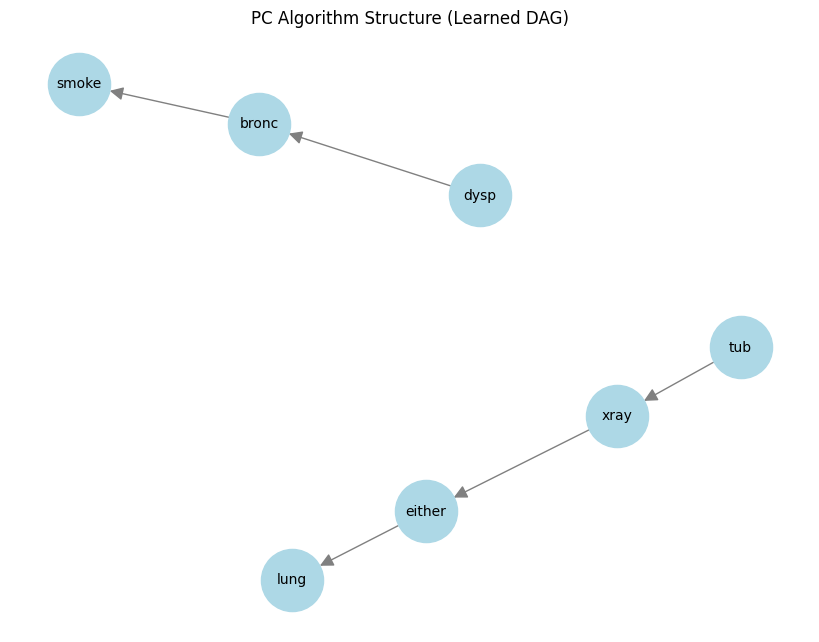

In [5]:
import matplotlib.pyplot as plt
import networkx as nx

# Convert to DiGraph if not already (just to be sure)
G = nx.DiGraph()
G.add_nodes_from(model_pc.nodes())
G.add_edges_from(model_pc.edges())

# Define layout
pos = nx.spring_layout(G, seed=42)

# Draw the graph
plt.figure(figsize=(8, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=2000,
        arrows=True, arrowstyle='-|>', arrowsize=20, edge_color='gray', font_size=10)

plt.title("PC Algorithm Structure (Learned DAG)")
plt.axis('off')
plt.show()


# Visualizing the PC Algorithm Structure
import matplotlib.pyplot as plt
import networkx as nx

plt.figure(figsize=(8,6))
##nx.draw(model_pc.to_digraph(), with_labels=True, node_color='lightblue', node_size=2000)

nx.draw(model_pc, with_labels=True, node_color='lightblue', node_size=2000)
plt.title("PC Algorithm Structure")
plt.show()

## 📊 Score-Based Learning (BIC)

In [6]:

from pgmpy.estimators import HillClimbSearch, BicScore

hc = HillClimbSearch(data)
model_bic = hc.estimate(scoring_method=BicScore(data))
model_bic.edges()


  0%|          | 9/1000000 [00:00<8:43:17, 31.85it/s] 


OutEdgeView([('either', 'lung'), ('either', 'tub'), ('either', 'dysp'), ('tub', 'lung'), ('xray', 'either'), ('smoke', 'bronc'), ('lung', 'smoke'), ('bronc', 'dysp')])

### 🖼 Visualize BIC Learned Structure
Bayesian Information Criterion 

In [8]:
pos = nx.spring_layout(model_bic, seed=42)
print(pos)

{'either': array([nan, nan]), 'asia': array([nan, nan]), 'tub': array([nan, nan]), 'xray': array([nan, nan]), 'smoke': array([nan, nan]), 'dysp': array([nan, nan]), 'lung': array([nan, nan]), 'bronc': array([nan, nan])}


In [9]:
pos = nx.circular_layout(model_bic)
print(pos)
# or

{'either': array([1.00000000e+00, 1.83784272e-08]), 'asia': array([0.70710678, 0.70710677]), 'tub': array([-1.73863326e-08,  9.99999992e-01]), 'xray': array([-0.70710672,  0.70710677]), 'smoke': array([-9.99999947e-01, -6.90443471e-08]), 'dysp': array([-0.70710678, -0.70710667]), 'lung': array([ 3.82499349e-08, -9.99999955e-01]), 'bronc': array([ 0.70710666, -0.70710685])}


In [10]:
pos = nx.kamada_kawai_layout(model_bic)
print(pos)

{'either': array([ 1.00000000e+00, -1.55378654e-09]), 'asia': array([0.70710677, 0.70710676]), 'tub': array([-5.95193010e-09,  9.99999988e-01]), 'xray': array([-0.70710674,  0.70710677]), 'smoke': array([-9.99999963e-01, -2.89249528e-08]), 'dysp': array([-0.70710677, -0.70710671]), 'lung': array([ 6.83531903e-09, -9.99999965e-01]), 'bronc': array([ 0.7071067 , -0.70710681])}


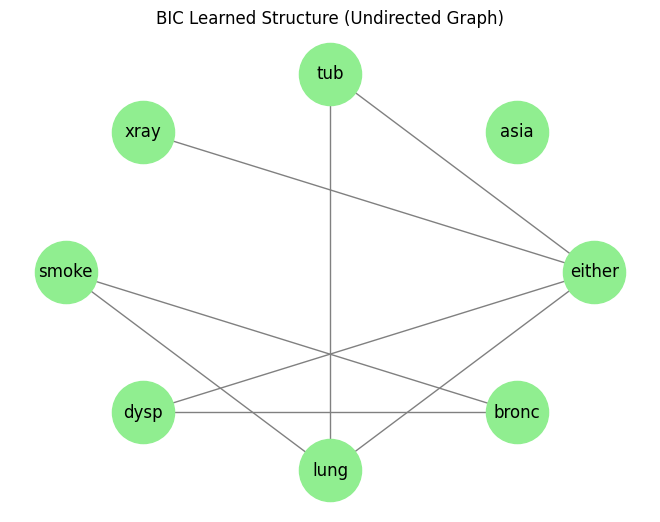

In [11]:
nx.draw(model_bic, pos,
        with_labels=True,
        node_color='lightgreen',
        node_size=2000,
        edge_color='gray',
        arrows=False)  # turn arrows off
plt.title("BIC Learned Structure (Undirected Graph)")
plt.show()


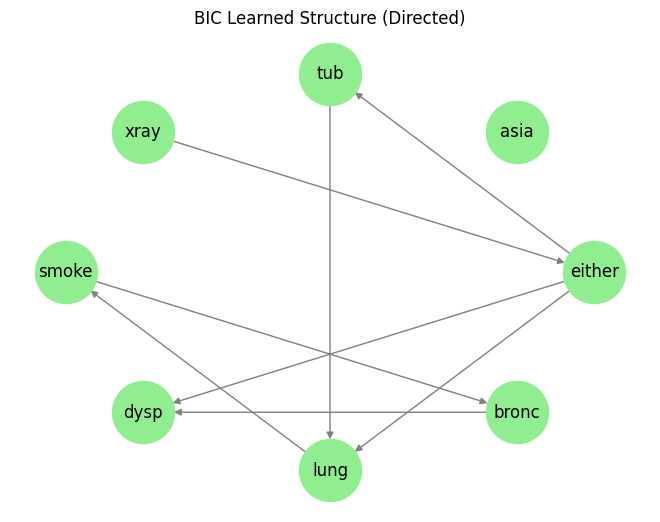

In [12]:
nx.draw(model_bic, pos,
        with_labels=True,
        node_color='lightgreen',
        node_size=2000,
        edge_color='gray',
        arrows=True)  # turn arrows off
plt.title("BIC Learned Structure (Directed)")
plt.show()

the interpretation of the output
[('tub', 'lung'),
 ('bronc', 'dysp'),
 ('either', 'lung'),
 ('either', 'tub'),
 ('either', 'dysp'),
 ('xray', 'either'),
 ('smoke', 'bronc'),
 ('lung', 'smoke')]
 These represent the directed dependencies between variables learned using the BIC score, which tries to balance goodness-of-fit with model complexity.

plt.figure(figsize=(8,6))
nx.draw(model_bic.to_digraph(), with_labels=True, node_color='lightgreen', node_size=2000)
plt.title("Score-Based (BIC) Structure")
plt.show()

## ✅ Compare with True Model

In [ ]:
import sys
sys.path.append('E:/Git_repo/structure_learning/modules')
from evaluate_model import hamming_distance
# Calculate Hamming distance between the two models

In [14]:
#from pgmpy.metrics import hamming_distance
# Calculate Hamming distance between the learned models and the true model
# Note: The true model is not provided in the example, so we will assume
# For demonstration, we will use the same Asia model as the true model
# Assuming you have a function to calculate Hamming distance
# between two model
true_model = asia_model
print("Hamming Distance (PC):", hamming_distance(model_pc, true_model))
print("Hamming Distance (BIC):", hamming_distance(model_bic, true_model))


Hamming Distance (PC): 13
Hamming Distance (BIC): 10



## 📌 Summary
- **PC Algorithm** uses conditional independence tests to recover structure.
- **Score-based (BIC)** methods optimize a global score.
- **Evaluation** shows structural closeness to ground truth.
- This project demonstrates the core ideas from **Chapter 18** using real Bayesian network tools.


## 🔁 Bayesian Model Averaging (Approximation)

In [15]:
import sys
sys.path.append('E:/Git_repo/structure_learning/modules')
from bma_and_parameter_learning import sample_structures

In [16]:
from bma_and_parameter_learning import sample_structures

edge_probs, sampled_models = sample_structures(data, num_samples=20)
for edge, prob in sorted(edge_probs.items(), key=lambda x: -x[1]):
    print(f"Edge {edge} - Posterior Probability: {prob:.2f}")


  0%|          | 12/1000000 [00:00<6:44:20, 41.22it/s]

Edge ('either', 'xray') - Posterior Probability: 1.00
Edge ('dysp', 'either') - Posterior Probability: 1.00
Edge ('asia', 'smoke') - Posterior Probability: 1.00
Edge ('asia', 'bronc') - Posterior Probability: 1.00
Edge ('asia', 'xray') - Posterior Probability: 1.00
Edge ('either', 'tub') - Posterior Probability: 1.00
Edge ('bronc', 'smoke') - Posterior Probability: 1.00
Edge ('either', 'lung') - Posterior Probability: 1.00
Edge ('lung', 'smoke') - Posterior Probability: 1.00
Edge ('bronc', 'dysp') - Posterior Probability: 1.00


### 🖼 Visualize Edge Probabilities (as Graph)

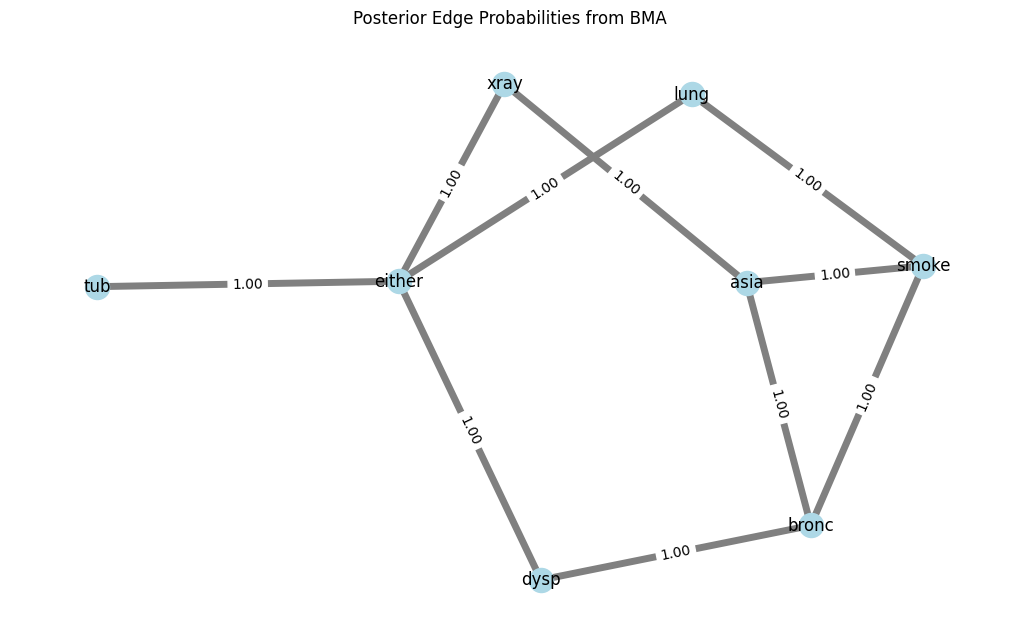

In [17]:
G = nx.Graph()
for edge, prob in edge_probs.items():
    G.add_edge(*edge, weight=prob)

pos = nx.spring_layout(G)
edges = G.edges(data=True)
weights = [d['weight'] * 5 for (_, _, d) in edges]

plt.figure(figsize=(10,6))
nx.draw(G, pos, with_labels=True, width=weights, node_color='lightblue', edge_color='gray')
edge_labels = {(u,v): f"{d['weight']:.2f}" for u,v,d in edges}
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)
plt.title("Posterior Edge Probabilities from BMA")
plt.show()


## 📐 Parameter Learning

In [20]:
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

def learn_parameters(model, data):
    """
    Use Maximum Likelihood Estimation to learn CPDs for a given structure.
    """
    # If model is a DAG, convert to BayesianModel
    if not isinstance(model, BayesianModel):
        model = BayesianModel(model.edges())
        
    model.fit(data, estimator=MaximumLikelihoodEstimator)
    return model


In [ ]:
model_bic = learn_parameters(model_bic, data)
print(model_bic.get_cpds())

[<TabularCPD representing P(either:2 | xray:2) at 0x22c7b471370>, <TabularCPD representing P(lung:2 | either:2, tub:2) at 0x22c7b4712e0>, <TabularCPD representing P(tub:2 | either:2) at 0x22c7b471250>, <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x22c7b471490>, <TabularCPD representing P(xray:2) at 0x22c7b4711c0>, <TabularCPD representing P(smoke:2 | lung:2) at 0x22c7b4710a0>, <TabularCPD representing P(bronc:2 | smoke:2) at 0x22c7b471400>]


e:\Git_repo\structure_learning\mystructv\Lib\site-packages\pgmpy\models\BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNewtork class, BayesianModel will be removed in future.
  warnings.warn(


In [25]:
model_bic = learn_parameters(model_bic, data)
model_bic.get_cpds()

[<TabularCPD representing P(either:2 | xray:2) at 0x22c7b473a40>,
 <TabularCPD representing P(lung:2 | either:2, tub:2) at 0x22c7b473ad0>,
 <TabularCPD representing P(tub:2 | either:2) at 0x22c7b473d10>,
 <TabularCPD representing P(dysp:2 | bronc:2, either:2) at 0x22c7b473bf0>,
 <TabularCPD representing P(xray:2) at 0x22c7b472960>,
 <TabularCPD representing P(smoke:2 | lung:2) at 0x22c7b473c80>,
 <TabularCPD representing P(bronc:2 | smoke:2) at 0x22c7b473b60>]

## 🔎 Inference on Learned Model

In [33]:
from bma_and_parameter_learning import perform_inference
result = perform_inference(model_bic, query=["dysp"], evidence={"either": 1})
print(result)
#result.plot()


Eliminating: smoke: 100%|██████████| 4/4 [00:00<00:00, 1068.68it/s]

+-----------+-------------+
| dysp      |   phi(dysp) |
+===========+=============+
| dysp(no)  |      0.1855 |
+-----------+-------------+
| dysp(yes) |      0.8145 |
+-----------+-------------+


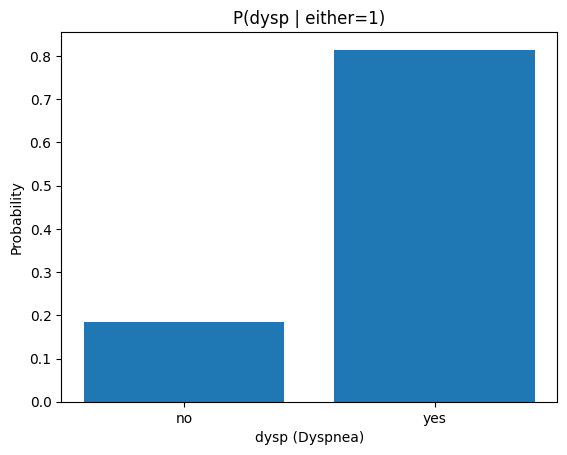

In [34]:
import matplotlib.pyplot as plt

# result is a DiscreteFactor
states = result.state_names['dysp']
probabilities = result.values

plt.bar(states, probabilities)
plt.xlabel('dysp (Dyspnea)')
plt.ylabel('Probability')
plt.title('P(dysp | either=1)')
plt.show()

